### Importing Libraries

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [112]:
data = pd.read_csv("D:\Sachin\Courses\FullStack Data Science\EDA_and_FE\Dataset\data0\hr_cleaned.csv")
data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,Undefined,NaN,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Small & Medium-org.,Pvt Ltd,5,47,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,Undefined,NaN,0,83,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0,Undefined,Pvt Ltd,0,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,Small & Medium-org.,Funded Startup,4,8,0.0


In [113]:
data.columns

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19158 non-null  int64  
 8   company_size            19158 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            19158 non-null  int64  
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 1.9+ MB


There are some missing values in few columns

In [115]:
###check missing values
data.isnull().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                   0
company_size                 0
company_type              6140
last_new_job                 0
training_hours               0
target                       0
dtype: int64

In [116]:
for feature in ['gender','enrolled_university','education_level','major_discipline','company_type']:
    print(f"{feature} has {data.isnull().sum()[feature]} missing values.")

gender has 4508 missing values.
enrolled_university has 386 missing values.
education_level has 460 missing values.
major_discipline has 2813 missing values.
company_type has 6140 missing values.


In [117]:
for feature in ['gender','enrolled_university','education_level','major_discipline','company_type']:
    print(data[feature].value_counts())
    print("--------------------")

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64
--------------------
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64
--------------------
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64
--------------------
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64
--------------------
Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64
--------------------


In [118]:
data[data['gender'].isnull()]

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,Undefined,NaN,0,83,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0,Undefined,Pvt Ltd,0,52,1.0
5,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,Undefined,NaN,1,24,1.0
9,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,Large-org.,Pvt Ltd,5,123,0.0
10,city_21,0.624,NaN,No relevent experience,Full time course,High School,NaN,2,Undefined,NaN,0,32,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19140,city_103,0.920,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,Undefined,NaN,0,15,0.0
19144,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,4,Undefined,NaN,0,48,1.0
19145,city_44,0.725,NaN,No relevent experience,Full time course,Graduate,STEM,5,Undefined,Pvt Ltd,0,190,0.0
19148,city_21,0.624,NaN,Has relevent experience,no_enrollment,Masters,STEM,3,Small & Medium-org.,Pvt Ltd,3,40,1.0


### Ways to Handle Missing Values:-<br>
1: Replace with Random Values<br>
2: Forward Filling<br>
3: Backward Filling<br>
4: Statistical Approach ----> Mean,Median,Mode<br>
5: End of Distribution<br>
6: Drop the Row<br>
7: KNN-Imputer<br>
8: Use ML Algorithm<br>
9: Own ML model to replace values<br>

In [119]:

data.isnull().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                   0
company_size                 0
company_type              6140
last_new_job                 0
training_hours               0
target                       0
dtype: int64

In [120]:
### Forward filling
data.ffill(axis=1)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,Undefined,Undefined,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Small & Medium-org.,Pvt Ltd,5,47,0.0
2,city_21,0.624,0.624,No relevent experience,Full time course,Graduate,STEM,5,Undefined,Undefined,0,83,0.0
3,city_115,0.789,0.789,No relevent experience,No relevent experience,Graduate,Business Degree,0,Undefined,Pvt Ltd,0,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,Small & Medium-org.,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,Undefined,Undefined,1,42,1.0
19154,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,Undefined,Undefined,4,52,1.0
19155,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,Small & Medium-org.,Pvt Ltd,4,44,0.0
19156,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,High School,0,Small & Medium-org.,Pvt Ltd,2,97,0.0


In [121]:
### backward fill

data.bfill(axis=1)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,Undefined,1,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Small & Medium-org.,Pvt Ltd,5,47,0.0
2,city_21,0.624,No relevent experience,No relevent experience,Full time course,Graduate,STEM,5,Undefined,0,0,83,0.0
3,city_115,0.789,No relevent experience,No relevent experience,Graduate,Graduate,Business Degree,0,Undefined,Pvt Ltd,0,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,Small & Medium-org.,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,Undefined,1,1,42,1.0
19154,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,Undefined,4,4,52,1.0
19155,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,Small & Medium-org.,Pvt Ltd,4,44,0.0
19156,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,0,0,Small & Medium-org.,Pvt Ltd,2,97,0.0


In [122]:
data.isnull().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                   0
company_size                 0
company_type              6140
last_new_job                 0
training_hours               0
target                       0
dtype: int64

In [123]:
data['gender'].mode()

0    Male
Name: gender, dtype: object

In [124]:
data['gender'].mode()[0]

'Male'

In [125]:
### replace with Mode
for feature in ['gender','enrolled_university','education_level','major_discipline','company_type']:
    data[feature].fillna(data[feature].mode()[0])

In [126]:
###drop row with null values
data.dropna()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Small & Medium-org.,Pvt Ltd,5,47,0.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,Small & Medium-org.,Funded Startup,4,8,0.0
7,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,Small & Medium-org.,Pvt Ltd,5,18,1.0
8,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,Small & Medium-org.,Pvt Ltd,1,46,1.0
11,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,Large-org.,Pvt Ltd,1,108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,Small & Medium-org.,Pvt Ltd,1,52,1.0
19149,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,Small & Medium-org.,Pvt Ltd,1,36,1.0
19150,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,Small & Medium-org.,Public Sector,3,23,0.0
19152,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,Small & Medium-org.,Funded Startup,1,25,0.0


In [127]:
data.shape

(19158, 13)

In [128]:
data.fillna(method='ffill',inplace=True)

In [129]:
data.shape

(19158, 13)

In [130]:
data.isnull().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              1
last_new_job              0
training_hours            0
target                    0
dtype: int64

### Check Outliers

IQR = Q3-Q1<br>
Upper Limit = Q3 + 1.5 x IQR<br>
Lower Limit = Q1 - 1.5 x IQR<br>

In [131]:
##segregate the data
cat_col = [fea for fea in data.columns if data[fea].dtypes == 'O']

In [132]:
num_col = [fea for fea in data.columns if data[fea].dtypes != 'O']

In [133]:
data.columns

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

In [134]:
data.dtypes

city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                  int64
company_size               object
company_type               object
last_new_job                int64
training_hours              int64
target                    float64
dtype: object

city_development_index


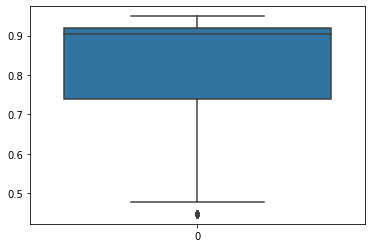

experience


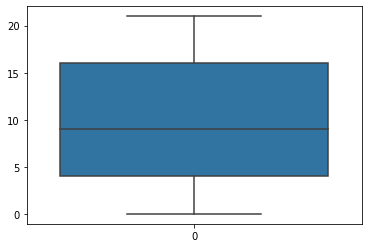

last_new_job


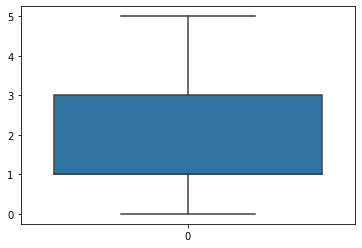

training_hours


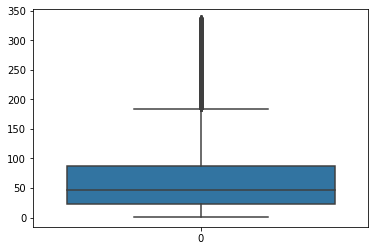

target


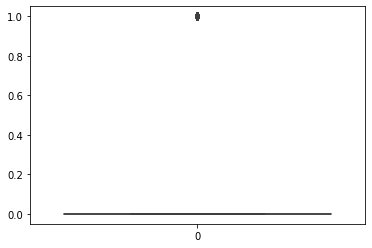

In [135]:
#### boxplot
for feature in num_col:
    print(feature)
    plt.figure()
    sns.boxplot(data = data[feature])
    plt.show()

In [136]:
#### get IQR, upper_limit and lower_limit
q1 = data['city_development_index'].quantile(0.25)
q3 = data['city_development_index'].quantile(0.75)
IQR = q3-q1
upper_limit = q3 + (1.5*IQR)
lower_limit = q1 - (1.5*IQR)

In [137]:
###outliers 
outliers_train = data[data['training_hours']>upper_limit].index